In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


In [2]:
wine = load_wine()
X = wine.data
y = wine.target


In [3]:
le = LabelEncoder()
y = le.fit_transform(y)


In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [8]:
boost_errors = []
trees = range(1, 201)
for n in trees:
    boost = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n,
        learning_rate=0.5,
        random_state=42
    )
    boost.fit(X_train, y_train)
    pred = boost.predict(X_test)
    boost_errors.append(1 - accuracy_score(y_test, pred))


C:\Users\Sree Raag\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Sree Raag\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Sree Raag\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Sree Raag\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remov

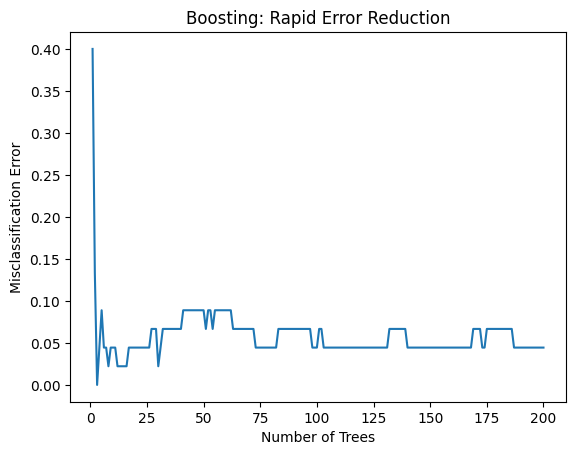

In [9]:
plt.figure()
plt.plot(trees, boost_errors)
plt.xlabel("Number of Trees")
plt.ylabel("Misclassification Error")
plt.title("Boosting: Rapid Error Reduction")
plt.show()


In [12]:
boost_configs = {
    "No shrinkage": GradientBoostingClassifier(
        learning_rate=1.0,
        subsample=1.0,
        max_features=None,
        random_state=42
    ),

    "learning_rate=0.2": GradientBoostingClassifier(
        learning_rate=0.2,
        subsample=1.0,
        max_features=None,
        random_state=42
    ),

    "subsample=0.5": GradientBoostingClassifier(
        learning_rate=1.0,
        subsample=0.5,
        max_features=None,
        random_state=42
    ),

    "learning_rate=0.2, subsample=0.5": GradientBoostingClassifier(
        learning_rate=0.2,
        subsample=0.5,
        max_features=None,
        random_state=42
    ),

    "learning_rate=0.2, max_features=0.5": GradientBoostingClassifier(
        learning_rate=0.2,
        subsample=1.0,
        max_features=0.5,
        random_state=42
    )
}


In [13]:
n_estimators = 400
boosting_errors = {}

for name, model in boost_configs.items():
    model.set_params(n_estimators=n_estimators)
    model.fit(X_train, y_train)

    errors = []
    for y_pred in model.staged_predict(X_test):
        errors.append(1 - accuracy_score(y_test, y_pred))

    boosting_errors[name] = errors


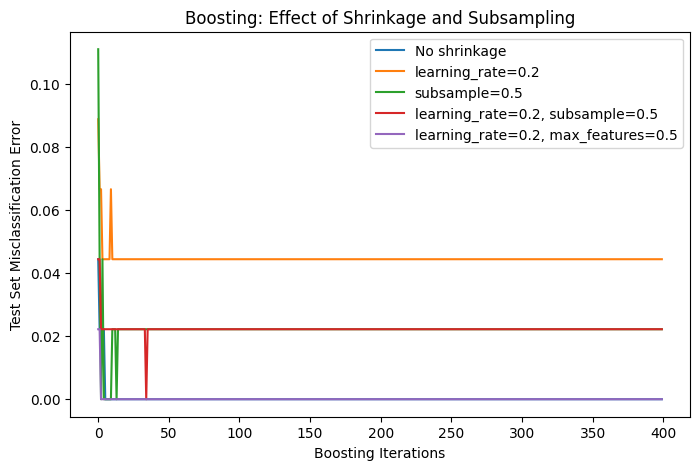

In [14]:
plt.figure(figsize=(8, 5))

for name, errors in boosting_errors.items():
    plt.plot(errors, label=name)

plt.xlabel("Boosting Iterations")
plt.ylabel("Test Set Misclassification Error")
plt.title("Boosting: Effect of Shrinkage and Subsampling")
plt.legend()
plt.show()
